In [34]:
import json
import os
import random
import pandas as pd
import seaborn as sns
from typing import List

import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, defaultdict
from imantics import Mask, Polygons

In [63]:
hold_class_mapping = {"hold": 0, "volume": 1}


def create_stats(
    img_dir: str, annotation_filename: str = "annotation-bh.json"
) -> List[dict]:
    annotation_json = os.path.join(img_dir, annotation_filename)
    with open(annotation_json, "r") as f:
        img_annotations = json.load(f)["_via_img_metadata"]
    hold_types_per_image = defaultdict(lambda: defaultdict(int))
    total_region_percentages = []
    for image in img_annotations.values():
        if not image["regions"]:
            # Skip images that have no region annotation, i.e. not annotated images
            continue
        if not all(
            [
                region["region_attributes"]["label_type"] == "handlabeled"
                for region in image["regions"]
            ]
        ):
            # Skip images which have regions that are not handlabeled
            continue
        image_filename = os.path.join(img_dir, image["filename"])
        height, width = cv2.imread(image_filename).shape[:2]
        area = height * width
        for region in image["regions"]:
            hold_type = region["region_attributes"]["hold_type"]
            hold_types_per_image[image["filename"]][hold_type] += 1

            anno = region["shape_attributes"]
            px = anno["all_points_x"]
            py = anno["all_points_y"]
            polygons = [(x, y) for (x, y) in zip(px, py)]

            mask = Polygons(polygons=polygons).mask(height=height, width=width)
            percentage = (mask.sum() / area) * 100
            total_region_percentages.append(percentage)

    return hold_types_per_image, total_region_percentages

In [64]:
hodls, region_percentage = create_stats("ml/cv-bh-data/")
df = pd.DataFrame.from_dict(hodls)

Text(0.5, 1.0, 'Instances per category')

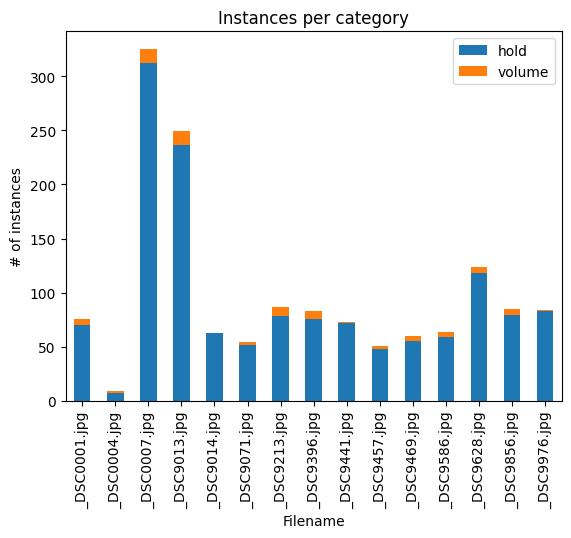

In [65]:
df = df.transpose()
fig, ax = plt.subplots()
df.plot(ax=ax, kind="bar", stacked=True)
ax.set_ylabel("# of instances")
ax.set_xlabel("Filename")
ax.set_title("Instances per category")

Text(0.5, 1.0, 'Instance size')

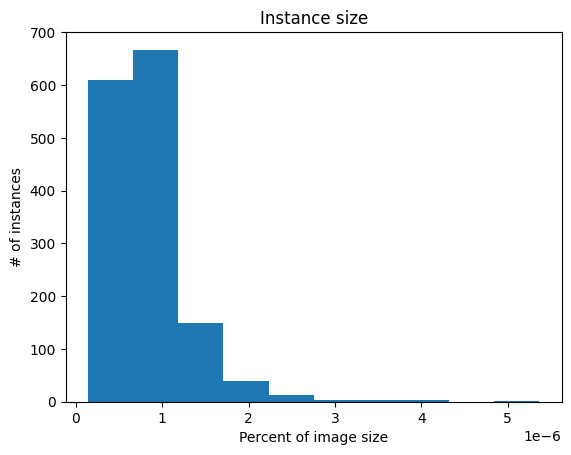

In [62]:
fig, ax = plt.subplots()
ax.hist(region_percentage)
ax.set_xlabel("Percent of image size")
ax.set_ylabel("# of instances")
ax.set_title("Instance size")

In [68]:
x = [1, 2, 3, 3]
y = [4, 4, 4, 4]
np.vstack((x, y))

array([[1, 2, 3, 3],
       [4, 4, 4, 4]])